#### Practice Project - 6

# Advertising Sales Channel Prediction

#### Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [274]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings 
warnings.filterwarnings('ignore')

In [131]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


##### about features 
* TV : advertising dollars spent on TV for a single product in a given market(in thousands of dollars)
* Radio : advertising dollars spent on Radio
* Newspaper : advertising dollars spent on newspaper

##### label
* Sales : sales of a single product in given market

In [132]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [133]:
# checking shape of columns
df.shape

(200, 5)

In [134]:
# checking nulls 
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [135]:
# checking duplicate value
df.duplicated().sum()

0

In [136]:
# checking empty value
df.loc[df['sales']==" "]

,Unnamed: 0,TV,radio,newspaper,sales


In [137]:
df.loc[df['radio']==" "]

,Unnamed: 0,TV,radio,newspaper,sales


In [138]:
df.loc[df['newspaper']==" "]

,Unnamed: 0,TV,radio,newspaper,sales


In [139]:
df.loc[df['TV']==" "]

,Unnamed: 0,TV,radio,newspaper,sales


* there is no Null, Duplicate and Empty value in our dataset

In [140]:
# checking stats of data 
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


* Data distribution looks good in TV and Radio as values in quantile range are nearly equally and mean and std are also relatable but in Newspaper columns max of quantile range goes much higher so there might be outliers

<AxesSubplot:>

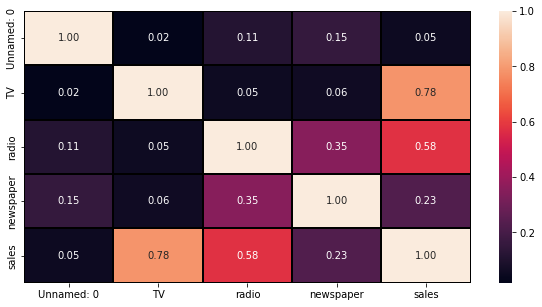

In [141]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr().abs(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

* I see only TV and radio have better correlation with sales 

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

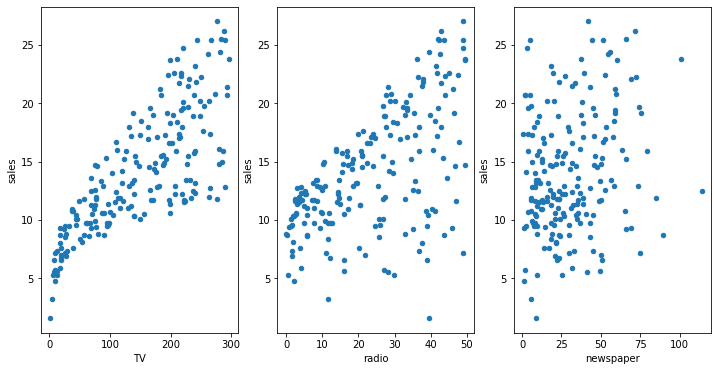

In [142]:
# visualing the relation of feature with label
fig, axs = plt.subplots(1,3)
df.plot(kind='scatter', x='TV',y='sales',ax=axs[0],figsize=(12,6))
df.plot(kind='scatter', x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter', x='newspaper',y='sales',ax=axs[2])


* I can see there is linera relationship b/W TV and sales 
* And b/w radio and sales it is also linear one
* there is no linear relationship b/w newspaper and sales

In [143]:
# checking skewness 
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

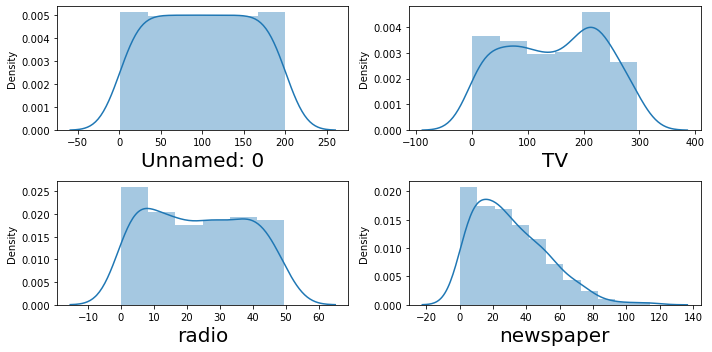

In [144]:
# visualing data distribution
plt.figure(figsize = (10,5))
plotnumber = 1

for column in df:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

* Data looks skewed in newspaper

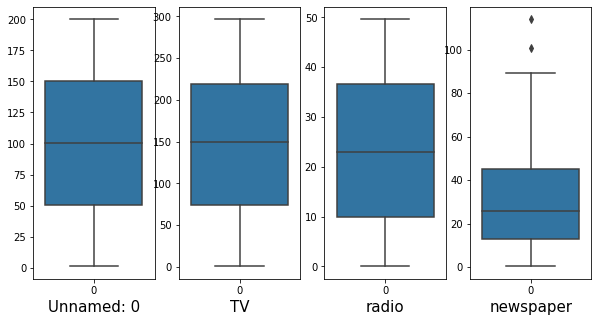

In [145]:
# checking outlier
plt.figure(figsize=(10,5))
graph = 1
for column in df:
    if graph<=4:
        plt.subplot(1,4,graph)
        ax = sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show() 

* outliers are only in newspaper

####  Data Cleaning

In [146]:
# removing newspaper and unnamed as unnamed looks like index and of no use and newspaper is very less correlated with taget and
# contains outliers
df = df.drop(columns=['Unnamed: 0','newspaper'],axis=1)

In [147]:
features = ['TV','radio']

In [148]:
# as over data starts from zero and no one will invest 0 dollars so i am gonna transfrom the data
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[features] = scaler.fit_transform(df[features].values)
df[features]

,TV,radio
0,0.948674,0.962247
1,-1.191314,1.040179
2,-1.647757,1.370710
3,0.141020,1.142387
4,0.452715,-0.748651
...,...,...
195,-1.287908,-1.431436
196,-0.520949,-1.297017
197,0.413091,-0.875492
198,1.455843,1.177722


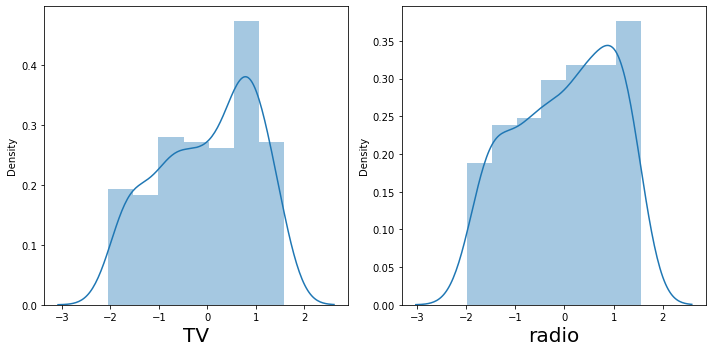

In [149]:
plt.figure(figsize = (10,5))
plotnumber = 1

for column in df[features]:
    if plotnumber<=4:
        ax = plt.subplot(1,2,plotnumber)
        sns.distplot(df[features][column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

### Model Building

In [150]:
# seperate feature and label
x = df[features]
y = df['sales']

In [151]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 348)

## LinearRegression

In [152]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [153]:
# checking train sccore 
lr.score(x_train,y_train)

0.9106208912028522

In [154]:
# checking test score
lr.score(x_test,y_test)

0.8946891497980104

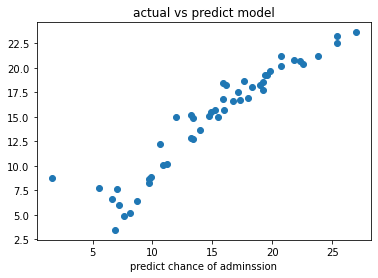

In [158]:
# comparing actual and predicted value
plt.scatter(y_test,y_pred)
plt.xlabel('actual chance of admission')
plt.xlabel('predict chance of adminssion')
plt.title('actual vs predict model')
plt.show()

In [177]:
from sklearn import metrics
y_pred = lr.predict(x_test)
print("****accuracy****")
print(metrics.r2_score(y_test,y_pred))

****accuracy****
0.8946891497980104


In [159]:
# model evaluation 

In [160]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = lr.predict(x_test)

In [161]:
# MAE
mean_squared_error(y_test,y_pred)

3.4647375027304785

In [162]:
# MSE
mean_absolute_error(y_test,y_pred)

1.3748669975328645

In [163]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

1.8613805367872736

* linear regression model biult successfully
let's check if our model is overfitting

In [164]:
# Regularisation

In [165]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lassocv = LassoCV(alphas=None , max_iter=100 , normalize = True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
alpha

0.00031539363519797665

In [166]:
# now train with alpha
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00031539363519797665)

In [167]:
lasso_reg.score(x_test,y_test)

0.8946847773397697

* lr score and lasso score is same so our model is not over fitting

In [168]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [169]:
ridgecv.alpha_

0.001

In [170]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [171]:
ridge_model.score(x_test,y_test)

0.8946888652373238

##  AdaBoost 

In [178]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [180]:
# model prediction on data
y_pred = ada.predict(x_train)

In [181]:
accuracy = metrics.r2_score(y_train,y_pred)
print('R Square Score : ',accuracy)

R Square Score :  0.9757470977206306


In [186]:
# predicting the test data with the result
y_test_pred = ada.predict(x_test)
# predicting the test data with the result
accuracy = metrics.r2_score(y_test,y_test_pred)
y_test_pred = ada.predict(x_test)
print('R Square Score :- ',accuracy)

R Square Score :-  0.9427578877491396


* seems like model trained well now chcek weather model is overfitting

In [187]:
# cross validation if the model is overfitting

In [190]:
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(ada,x,y,cv=10)
cross_val_score(ada,x,y,cv=5).mean()

0.95230531710724

model is not overfittng as cross_val_score is not more than ada model accuracy 

#### Hyperparameter Tuning

In [191]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':[20,35,47,50,60,70,80,100], 'learning_rate':[0.25,0.30,0.40]}

In [192]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions = params)

In [194]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [195]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=70)

In [211]:
ada = AdaBoostRegressor(learning_rate=0.6,n_estimators=100)

ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
print("****accuracy post tuning****")
print(metrics.r2_score(y_test,y_pred))

****accuracy post tuning****
0.950171455728299


* as i see accuracy increased

## Knn

In [212]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [213]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [215]:
y_pred = knn.predict(x_test)
print('accuracy = ',metrics.r2_score(y_test,y_pred))

accuracy =  0.963088258090401


#### checking if model is overfitting

In [249]:
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(knn,x,y,cv=10)
cross_val_score(knn,x,y,cv=10).mean()

0.972953383014934

we can see model is not overfitting let's tune the parameter

### Hyperparameter tuning

In [219]:
from sklearn.model_selection import GridSearchCV
param_drid = {'algorithm': ['kd_tree','brute'],
             'leaf_size':[3,4,5,6,7,8],
             'n_neighbors':[3,4,7,9,11,13]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_drid)

In [220]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 4, 5, 6, 7, 8],
                         'n_neighbors': [3, 4, 7, 9, 11, 13]})

In [221]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

In [248]:
knn = KNeighborsRegressor(algorithm = 'kd_tree', leaf_size = 10, n_neighbors=1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("****accuracy post tuning****")
print(metrics.r2_score(y_test,y_pred))

****accuracy post tuning****
0.969051765800104


i see 0.6 % accuracy increased

##  SVM

In [254]:
from sklearn.svm import SVR
svr = SVR()

# model training and score
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
print('accuracy : ',metrics.r2_score(y_test,y_pred))

accuracy :  0.9408405832676404


#### cross validation

In [255]:
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(svr,x,y,cv=10)
cross_val_score(svr,x,y,cv=10).mean()

0.9671435043636812

model is not over fitting

### hyperparameter tuning

In [257]:
param_grid = {'C':[1,5,10,20],
              'gamma':[0.001,0.01,0.2,0.002]
             }
gridsearch = GridSearchCV(svr, param_grid)

gridsearch.fit(x_train,y_train)

# best param
gridsearch.best_params_

{'C': 20, 'gamma': 0.2}

In [278]:
svr = SVR(C=100,gamma=0.5)

# model training and score
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

print('post tuning accuracy :',metrics.r2_score(y_test,y_pred)*100)

post tuning accuracy : 98.93007693930265


* great accuracy is 99 %

#### As SVM model is giving best accuracy so i will save SVM model

In [279]:
# saving the model
import pickle
filename = "Sales_Prediction"
pickle.dump(svr,open(filename,'wb'))